# Q1

In [1]:
import requests 
import pandas as pd

url = "https://www.yonsei.ac.kr/sc/support/calendar.jsp"
res = requests.get(url)

In [2]:
print(res)
res.text

<Response [200]>


'\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=no">\n<title>학사지원 | 학사일정 목록 | 연세대학교</title>\n<script type="text/javascript">\n var _TRK_CP=  "^학사지원^학사일정목록^연세대학교";\n</script>  \n<script defer=\'defer\'>\n//<!--<![CDATA[\n/* COPYRIGHT 2002-2020 BIZSPRING INC. *//*X*//* DO NOT MODIFY THIS SCRIPT. *//*X*//* INSIGHT TRACKING FUNCTION SCRIPT V.5 : 8301 *//*X*/var ApsndCr = String.fromCharCode(38);var _TRK_DOMAIN="";var uuid="",sid="",guuid="",exp="";var _las=new Object({p:"8301",c:"cookie",u:undefined,w:window,d:document,n:navigator,un:"unknown",dm:"log.yonsei.ac.kr",sslDm:"log.yonsei.ac.kr",m:Math,trU:"/InsightTrk/tracker.do",ciU:"/InsightTrk/click.do",czU:"/InsightTrk/clickzone.do",cIo:function(a){return (a!=_las.u && a>0)?new Object(a):new Object()},cIi:function(){return new Image()},iX:functi

In [3]:
from bs4 import BeautifulSoup

# 첫번째 인자를 텍스트로 넣어줘야 함
soup = BeautifulSoup(res.text, 'html.parser')

In [4]:
soup.find('div')

<div id="wrap">
<div id="header">
<!-- header -->
<div class="topmenu">
<div class="inner">
<div class="campus">
<a href="#selCampus">신촌·국제<span></span></a>
<ul id="selCampus">
<li><a href="/sc" onmousedown="_trk_clickTrace( 'EVT', '메인^캠퍼스선택^신촌캠퍼스' );">신촌·국제<span>캠퍼스</span></a></li>
<li><a href="/wj" onmousedown="_trk_clickTrace( 'EVT', '메인^캠퍼스선택^미래캠퍼스' );">미래<span>캠퍼스</span></a></li>
<li><a href="https://www.yonsein.net/" onmousedown="_trk_clickTrace( 'EVT', '메인^캠퍼스선택^총동문회' );" target="_blank" title="연세대학교 총동문회 사이트 새창 열림">총동문회</a></li>
</ul>
</div>
<div class="toggle toggleUtil util">
<a class="fc" href="#utilmenu"><span class="ir">유틸메뉴 열기</span></a>
<div class="lt">
<strong>유틸메뉴</strong>
<button class="close" type="button">유틸메뉴 닫기</button>
</div>
<div class="inner" id="utilmenu">
<a href="/sc/etc/calendar.jsp" onmousedown="_trk_clickTrace( 'EVT', '웹^헤더^연세캘린더' );">연세캘린더<span class="ir"></span></a>
<a href="/sc/etc/faq.jsp" onmousedown="_trk_clickTrace( 'EVT', '웹^헤더^FAQ' );">FAQ<span c

In [5]:
haksa = soup.find('table')
haksa_lst = haksa.find_all('tr')

In [6]:
lst = []
for x in haksa_lst:
    if x.th is not None:
        month = (x.th.span.get_text())
    y = x.find_all('td')
    data = [month]+[x.text.replace('\n', '').replace('\t', '') for x in y]
    lst.append(data)

In [7]:
df = pd.DataFrame(lst, columns=['월(Month)', '일(Day)', '학사 일정(event)'])
df[:12]

,월(Month),일(Day),학사 일정(event)
0,02 FEB,1(수),휴 · 복학 접수 시작
1,02 FEB,13(월)~17(금),2023-1학기 수강신청
2,02 FEB,17(금)~23(목),2023-1학기 등록
3,02 FEB,22(수),복학 접수 마감
4,02 FEB,26(일),졸업예배
5,02 FEB,27(월),학위수여식
6,03 MAR,1(수),삼일절
7,03 MAR,2(목),개강 / 교무위원회
8,03 MAR,6(월)~8(수),수강신청 확인 및 변경
9,03 MAR,10(금)~13(월),2023-1학기 추가등록


# Q2

In [8]:
import selenium
from selenium import webdriver

driver = webdriver.Chrome()

In [9]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# 해당 URL로 이동
driver.get('https://www.naver.com/') 

# 웹 페이지 요소 로드를 기다림
driver.implicitly_wait(5)

In [10]:
# 현재 열려있는 페이지 url 찾기
url = driver.current_url
url

'https://www.naver.com/'

In [11]:
# XPATH를 이용하여 검색창에 해당하는 요소 찾기
search = driver.find_element(By.XPATH, '//*[@id="query"]')

In [12]:
# 검색어 입력
search.send_keys('고려대학교')

In [13]:
# Keys.RETURN = Enter 입력
search.send_keys(Keys.RETURN)

In [14]:
img = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[1]/div/div[2]/a/img')
img_url = img.get_attribute('src')

In [15]:
print(img_url)

https://search.pstatic.net/common?type=f&size=174x174&quality=100&direct=true&src=https%3A%2F%2Fldb-phinf.pstatic.net%2F20150831_102%2F1441001184354BvGxq_JPEG%2F11591498_0.jpg


In [16]:
from PIL import Image
import urllib.request

In [17]:
image = Image.open(requests.get(img_url, stream=True).raw)

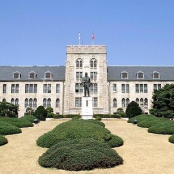

In [18]:
image

In [19]:
# 브라우저 닫기
driver.close()